## Setup

In [12]:
%load_ext autoreload
%autoreload 2
import sys 
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

sys.path.append("../")
from scripts.utils import get_project_path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
csv_path = get_project_path("data", "processed", "df_imputed.csv")
df_model = pd.read_csv(csv_path)
df_model.head()

,AN4,EC6,EC7,EC8,EC9,EC10,EC11,EC12,EC13,EC14,...,WAGE,WB14,windex5,HH48,WS1,BD2,BD3,CA1,stunted,ecd_on_track
0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Richest,4.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
1,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Middle,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
2,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Middle,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
3,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Middle,2.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
4,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Fourth,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1


In [14]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763450 entries, 0 to 3763449
Data columns (total 23 columns):
 #   Column        Dtype  
---  ------        -----  
 0   AN4           float64
 1   EC6           float64
 2   EC7           float64
 3   EC8           float64
 4   EC9           float64
 5   EC10          float64
 6   EC11          float64
 7   EC12          float64
 8   EC13          int64  
 9   EC14          float64
 10  EC15          float64
 11  WB6A          object 
 12  WB6B          object 
 13  WAGE          object 
 14  WB14          object 
 15  windex5       object 
 16  HH48          float64
 17  WS1           object 
 18  BD2           float64
 19  BD3           float64
 20  CA1           object 
 21  stunted       int64  
 22  ecd_on_track  int64  
dtypes: float64(13), int64(3), object(7)
memory usage: 660.4+ MB


In [15]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
AN4,3763450.0,3.491270,0.499924,3.0,3.0,3.0,4.0,4.0
EC6,3763450.0,0.290241,0.453874,0.0,0.0,0.0,1.0,1.0
EC7,3763450.0,0.311831,0.463241,0.0,0.0,0.0,1.0,1.0
EC8,3763450.0,0.297818,0.457299,0.0,0.0,0.0,1.0,1.0
EC9,3763450.0,0.920724,0.270169,0.0,1.0,1.0,1.0,1.0
EC10,3763450.0,0.231901,0.422046,0.0,0.0,0.0,0.0,1.0
EC11,3763450.0,0.862168,0.344723,0.0,1.0,1.0,1.0,1.0
EC12,3763450.0,0.853422,0.353685,0.0,1.0,1.0,1.0,1.0
EC13,3763450.0,0.947498,0.223037,0.0,1.0,1.0,1.0,1.0
EC14,3763450.0,0.362564,0.480740,0.0,0.0,0.0,1.0,1.0


## Numeric Feature Histograms

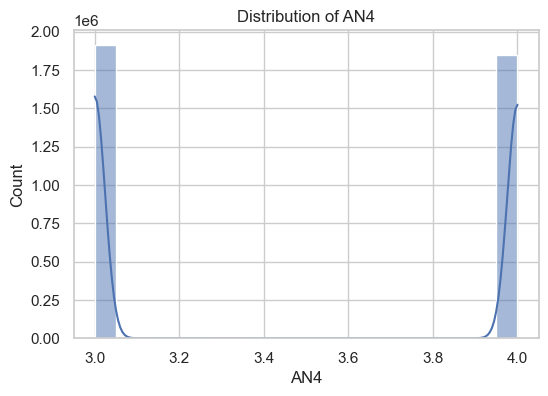

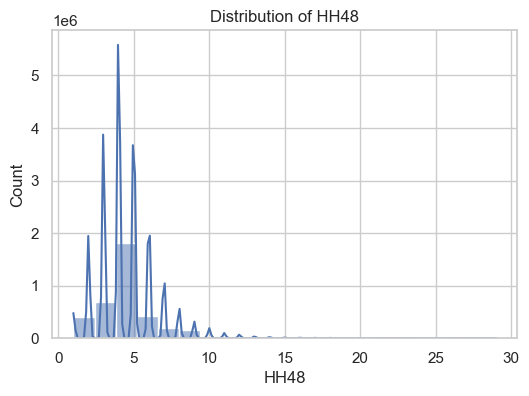

In [17]:
numeric_cols = ['AN4', 'HH48']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_model[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()